In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_excel('output_data_2020.xlsx', index_col=None)

In [29]:
df

,Unnamed: 0,date,fixing I course
0,0,2019-08-02 01:00:00,243.28
1,1,2019-08-02 02:00:00,236.99
2,2,2019-08-02 03:00:00,235.00
3,3,2019-08-02 04:00:00,230.00
4,4,2019-08-02 05:00:00,228.95
...,...,...,...
10986,10988,2020-11-01 20:00:00,189.75
10987,10989,2020-11-01 21:00:00,190.00
10988,10990,2020-11-01 22:00:00,195.26
10989,10991,2020-11-01 23:00:00,192.88


In [30]:
del df['Unnamed: 0']

In [31]:
df.columns

Index(['date', 'fixing I course'], dtype='object')

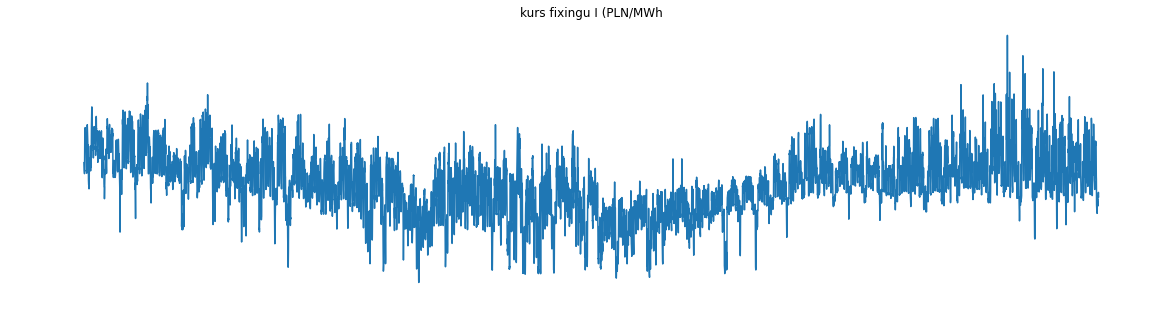

In [32]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['fixing I course'])
plt.title("kurs fixingu I (PLN/MWh")
params = {"ytick.color" : "w",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"
        }
plt.rcParams.update(params)
plt.show()

#### ARIMA Model (Auto Regression)

In [33]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10991 non-null  datetime64[ns]
 1   fixing I course  10991 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 171.9 KB
None


In [51]:
len(df) - round(len(df) *0.8 )

2198

In [66]:
df.iloc[:4000]

,date,fixing I course
0,2019-08-02 01:00:00,243.28
1,2019-08-02 02:00:00,236.99
2,2019-08-02 03:00:00,235.00
3,2019-08-02 04:00:00,230.00
4,2019-08-02 05:00:00,228.95
...,...,...
3995,2020-01-15 12:00:00,205.00
3996,2020-01-15 13:00:00,207.40
3997,2020-01-15 14:00:00,210.00
3998,2020-01-15 15:00:00,201.00


In [67]:
df = df.iloc[5000:]

In [71]:
df = df.reset_index(drop=True)

In [76]:
df

,date,fixing I course
0,2020-02-26 09:00:00,227.76
1,2020-02-26 10:00:00,221.74
2,2020-02-26 11:00:00,205.01
3,2020-02-26 12:00:00,214.55
4,2020-02-26 13:00:00,215.56
...,...,...
5986,2020-11-01 20:00:00,189.75
5987,2020-11-01 21:00:00,190.00
5988,2020-11-01 22:00:00,195.26
5989,2020-11-01 23:00:00,192.88


In [78]:
model = AutoReg(df['fixing I course'], 30)
model_fit = model.fit()

train_df = df.iloc[:round(len(df) * 0.8)]
test_df = df.iloc[round(len(df) * 0.8):]

train_model = AutoReg(train_df['fixing I course'], 1198).fit(cov_type='HC0')
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

pred = pd.DataFrame(prediction, columns=['predict fixing I course'])

Text(0, 0.5, 'fixing I course')

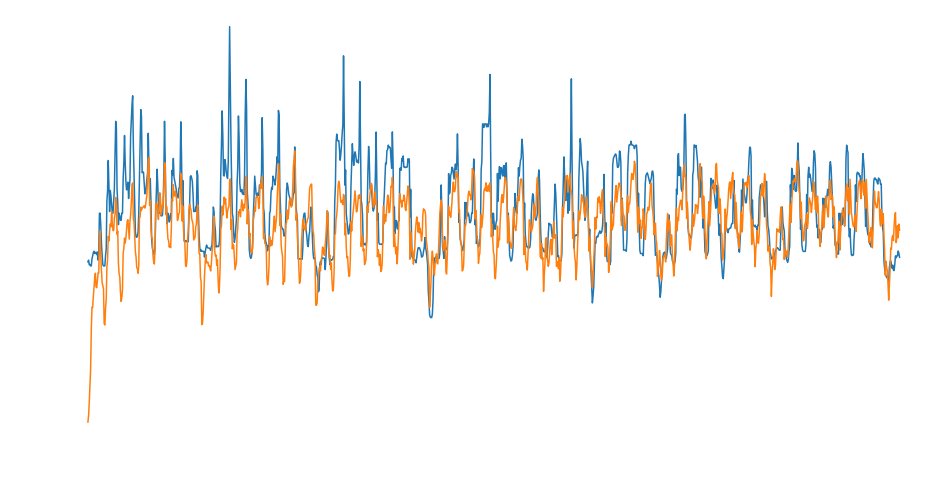

In [79]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(test_df['date'], test_df['fixing I course'], test_df['date'], pred['predict fixing I course'])
ax.set_xlabel('date')
ax.set_ylabel('fixing I course')


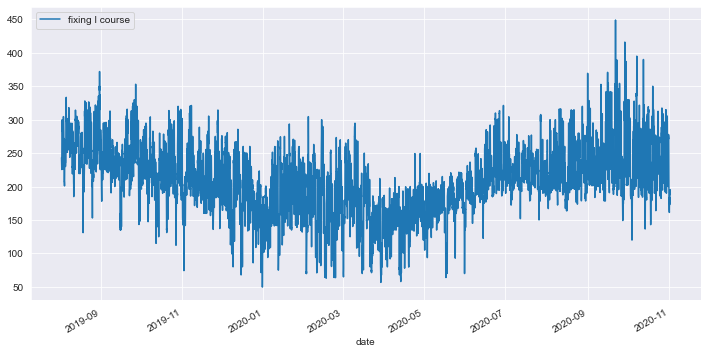

In [12]:
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = df.plot(x='date', ax=ax)

model = AutoReg(df['fixing I course'], 24)
model_fit = model.fit()


train_df = df.iloc[:9000]
test_df = df.iloc[9000:]

train_model = AutoReg(train_df['fixing I course'], 450).fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

ax = test_df.plot(x='date')
ax = prediction.plot(x='date')
ax.set_xlabel('date')
ax.set_ylabel('I fixing')


In [15]:
test_df

,date,fixing I course
9000,2020-08-11 02:00:00,193.03
9001,2020-08-11 03:00:00,193.01
9002,2020-08-11 04:00:00,193.09
9003,2020-08-11 05:00:00,194.00
9004,2020-08-11 06:00:00,192.89
...,...,...
10986,2020-11-01 20:00:00,189.75
10987,2020-11-01 21:00:00,190.00
10988,2020-11-01 22:00:00,195.26
10989,2020-11-01 23:00:00,192.88


In [16]:
prediction

9000       1.133198
9001      12.176861
9002      23.268690
9003      31.169346
9004      42.037045
            ...    
10986    217.901712
10987    216.500826
10988    212.756380
10989    210.433434
10990    193.079848
Length: 1991, dtype: float64

In [ ]:
ax = test_df.plot(x='date')
ax = prediction.plot(x='date')
ax.set_xlabel('date')
ax.set_ylabel('I fixing')